In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\pragy\Downloads\diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

It can be seen that there is no null column

In [6]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Diabetic->268,
Non-diabetic->500

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


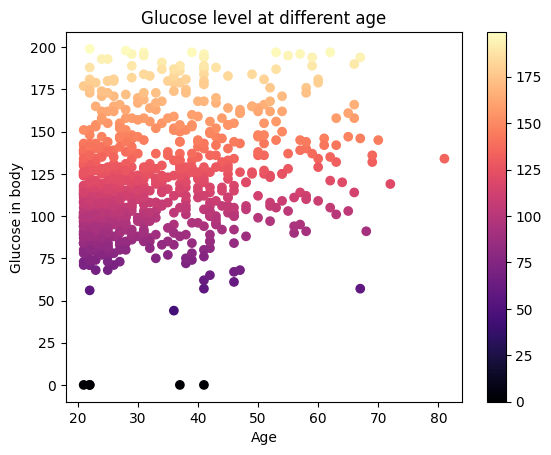

In [9]:
plt.scatter(df["Age"],df["Glucose"],c=df["Glucose"],cmap="magma")
plt.colorbar()
plt.title("Glucose level at different age")
plt.ylabel("Glucose in body")
plt.xlabel("Age")
plt.show()

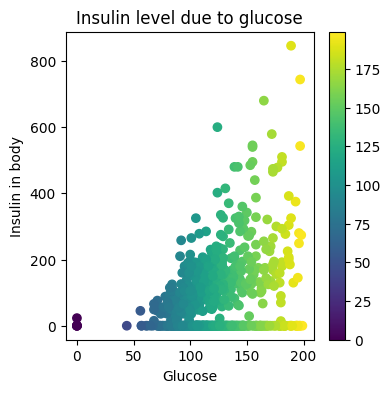

In [37]:
plt.figure(figsize=(3,3))
plt.scatter(df["Glucose"],df["Insulin"],c=df["Glucose"],cmap="viridis")
plt.colorbar()
plt.title("Insulin level due to glucose")
plt.ylabel("Insulin in body")
plt.xlabel("Glucose")
plt.show()

In [11]:
# df.head()

In [12]:
x = df.drop(columns="Outcome",axis=1)
y = df["Outcome"]

In [13]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Since there is a variation in values for all the columns so we will standardize the data 

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
s_features = scaler.fit_transform(x)

In [17]:
x = s_features

In [18]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [19]:
# y

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify = y,random_state = 2)

In [22]:
print(x.shape, x_train.shape, x_test.shape)

(768, 8) (614, 8) (154, 8)


In [23]:
from sklearn import svm
from sklearn.metrics import accuracy_score as acc

In [24]:
classifier = svm.SVC(kernel = "linear")

In [25]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

# Checking for model accuracy

In [26]:
prediction = classifier.predict(x_train)

In [27]:
# prediction

In [28]:
accuracy = acc(prediction,y_train)
accuracy *= 100
accuracy = round(accuracy,2)

In [29]:
print(f"Accuracy during training:- {accuracy}%")

Accuracy during training:- 78.66%


In [30]:
prediction_test = classifier.predict(x_test)

In [31]:
test_accu = acc(prediction_test,y_test)
test_accu *= 100
test_accu = round(test_accu,2)

In [32]:
print(f"Accuracy during testing:- {test_accu}%")

Accuracy during testing:- 77.27%


# Diabeties detection system

In [34]:
# x.head()

In [35]:
# x.describe()

In [43]:
list=[]
# print(list)
gender = input("Press M for male and F for female")
if gender == "M":
    pregnency = 0
    list.append(pregnency)
elif gender == "F":
    pregnency = input("How many pregnancy you have had?")
    list.append(pregnency)
    # print(list)


glucose_level = input("Amount of glucose in your body:- ")
list.append(glucose_level)

blood_pressure = input("Your average blood pressure in a day:- ") 
list.append(blood_pressure)

skin_thickness = input("Enter thickness of your skin:- ")
list.append(skin_thickness)

Insulin = input("Enter insulin level:- ")
list.append(Insulin)

BMI = input("Enter your BMI:- ")
list.append(BMI)

diabeties_pedigree = input("Enter your pedigree value (0.08 - 2.42)")
list.append(diabeties_pedigree)

age = input("Enter your age:- ")
list.append(age)


Press M for male and F for female M
Amount of glucose in your body(0-9):-  67
Your blood pressure average in a day (0-9):-  90
Enter thickness of your skin:-  30
Enter insulin level:-  100
Enter your BMI:-  20
Enter your pedigree value (0.08 - 2.42) 1.39
Enter your age:-  20


In [51]:
# input_data = (5,166,72,19,175,25.8,0.587,51)
print(list)
con_data = np.asarray(list)

[0, '67', '90', '30', '100', '20', '1.39', '20']


In [45]:
# con_data

In [46]:
con_data = con_data.reshape(1,-1)

In [47]:
stdd_data = scaler.transform(con_data)

C:\python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [48]:
detection = classifier.predict(stdd_data)

In [49]:
if(detection[0] == 0):
    print("you are less likely to have diabetes")
else:
    print("You should consult a doctor, chances of having diabetes is high")

NO diabeties
